In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Función `range_data` extrae un rango de archivos Parquet y los carga como DataFrames. Los parametros solicitados son:
- `url_trim` Porción de la url que se mantiene invariable
- `start_m` Mes del intervalo inferior
- `start_y` Año del intervalo inferior
- `end_m` Mes del intervalo superior
- `end_y` Año del intervalo superior

In [2]:
def downloaddf(url_trim:str,month:int,year:int):
    if len (str(int(month)))==1:
        month='0'+str(month)
    return  pd.read_parquet(url_trim+str(year)+'-'+str(month)+'.parquet')

def range_data(url_trim:str,start_m:int, start_y:int, end_m:int, end_y:int):
    if end_y - start_y < 0:
        return 'Error:  End Year is smaller than Start Year'
    elif end_y ==  start_y and end_m < start_m:
        return 'Error:  End Month is smaller than or equal to Start Month'
    elif start_m > 12 or end_m > 12:
        return 'Error: End Month or  Start Month is larger than 12'
    elif end_y ==  start_y and end_m == start_m:
        return downloaddf(url_trim,start_m,start_y)
    elif end_y == start_y:
        df1 =downloaddf(url_trim,start_m,start_y)
        for i in range(start_m + 1,end_m + 1):
            df2 =downloaddf(url_trim,i,start_y)
            df1 = pd.concat([df1,df2],ignore_index=True)
            del df2
        return df1
    elif  end_y > start_y:
        df1 =downloaddf(url_trim,start_m,start_y)
        for j in range(start_y ,end_y + 1):
            for k in range(start_m + 1,13):
                if  j==end_y and  k > end_m :break
                df2 =downloaddf(url_trim,k,j)
                df1 = pd.concat([df1,df2],ignore_index=True)
                del df2
            start_m  = 1
        return df1

## Yellow Taxi

Carga del conjunto de datos para `Yellow Taxi` comprendidos entre Diciembre del 2023 a Febrero del 2024 (Últimos tres meses)

In [3]:
url_trim = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_20'
yellow_taxi = range_data(url_trim,12,23,2,24)

Identificadores de zona de NYC

In [4]:
url_zonas = 'https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv'
zonas = pd.read_csv(url_zonas)

Descripción general de los datos

In [5]:
yellow_taxi.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,6.384093e+06,6384093,6384093,6.018480e+06,6.384093e+06,6.018480e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.018480e+06,6.018480e+06
mean,1.752486e+00,2024-01-13 16:31:28.945933,2024-01-13 16:48:36.978548,1.369609e+00,3.763223e+00,1.944311e+00,1.653185e+02,1.641954e+02,1.153407e+00,1.890391e+01,1.462321e+00,4.831266e-01,3.416135e+00,5.440987e-01,9.756331e-01,2.763841e+01,2.268330e+00,1.333158e-01
min,1.000000e+00,2002-12-31 22:16:54,2003-01-01 15:02:08,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.087300e+03,-3.917000e+01,-5.000000e-01,-1.400000e+02,-7.000000e+01,-1.000000e+00,-1.094050e+03,-2.500000e+00,-1.750000e+00
25%,2.000000e+00,2023-12-13 23:16:37,2023-12-13 23:32:55,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.570000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-12-29 18:40:00,2023-12-29 18:59:32,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.740000e+00,0.000000e+00,1.000000e+00,2.090000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2024-02-14 21:58:05,2024-02-14 22:11:57,1.000000e+00,3.180000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.340000e+00,0.000000e+00,1.000000e+00,3.024000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2024-03-01 00:01:37,2024-03-01 23:24:42,9.000000e+00,2.224783e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,9.792000e+03,5.168000e+01,4.217000e+01,4.174000e+03,1.613800e+02,1.000000e+00,9.792000e+03,2.500000e+00,1.750000e+00
std,4.330862e-01,NaN,NaN,8.759375e-01,2.076626e+02,9.188762e+00,6.414206e+01,6.948778e+01,5.934547e-01,1.882650e+01,1.805865e+00,1.192560e-01,4.328577e+00,2.162906e+00,2.179661e-01,2.345311e+01,8.104277e-01,4.747537e-01


En esta primera inspección pueden visualzarse registros fuera del rango temporal analizado

In [6]:
yellow_taxi[yellow_taxi['tpep_pickup_datetime'].dt.year < 2023]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
1128759,2,2002-12-31 22:16:54,2003-01-01 15:02:08,1.0,3.25,1.0,N,132,10,1,14.9,1.75,0.5,3.63,0.00,1.0,21.78,0.0,0.00
2531205,2,2002-12-31 23:03:18,2003-01-01 21:09:44,1.0,28.19,2.0,N,132,13,1,70.0,0.00,0.5,16.54,6.94,1.0,99.23,2.5,1.75
2601397,2,2009-01-01 00:02:41,2009-01-01 17:43:28,1.0,1.37,1.0,N,230,142,1,10.7,0.00,0.5,1.47,0.00,1.0,16.17,2.5,0.00
3557850,2,2008-12-31 22:52:49,2008-12-31 23:04:09,1.0,1.62,1.0,N,141,211,1,11.4,2.50,0.5,2.00,0.00,1.0,19.90,2.5,0.00
4275420,2,2009-01-01 00:02:13,2009-01-01 00:48:28,1.0,0.57,1.0,N,79,148,1,9.3,1.00,0.5,2.86,0.00,1.0,17.16,2.5,0.00


Eliminando registros fuera del rango temporal

In [7]:
yellow_taxi = yellow_taxi[yellow_taxi['tpep_pickup_datetime'].dt.year >= 2023]

El rango temporal es de 92 días (Aproximadamente 3 meses)

In [8]:
print(yellow_taxi['tpep_pickup_datetime'].dt.date.max() - yellow_taxi['tpep_pickup_datetime'].dt.date.min())

92 days, 0:00:00


El conjunto de datos contiene un total de 6 384 088 de registros nulos

In [9]:
yellow_taxi.isna().count()

VendorID                 6384088
tpep_pickup_datetime     6384088
tpep_dropoff_datetime    6384088
passenger_count          6384088
trip_distance            6384088
RatecodeID               6384088
store_and_fwd_flag       6384088
PULocationID             6384088
DOLocationID             6384088
payment_type             6384088
fare_amount              6384088
extra                    6384088
mta_tax                  6384088
tip_amount               6384088
tolls_amount             6384088
improvement_surcharge    6384088
total_amount             6384088
congestion_surcharge     6384088
Airport_fee              6384088
dtype: int64

Eliminando registros nulos

In [10]:
yellow_taxi = yellow_taxi.dropna()

### Variables
#### Variables cualitativas

1. `VendorID`. Identificador del proveedor del Taxicab Technology Service Provider (TPEP), el cual puede presentar solo dos ID´s:
- 1= Creative Mobile Technologies, LLC
- 2= VeriFone Inc.

2. `RateCodeID`. Identificador de tarifa vigente al finalizar el viaje. Puede tomar los siguientes valores:
- 1=Tarifa estándar
- 2=JFK
- 3=Newark
- 4=Nassau o Westchester
- 5=Tarifa negociada
- 6=Tarifa grupal

3. `Store_and_fwd_flag`. Esta variable indica si el registro se almaceno en el vehiculo para posteriormente enviarse al servidor. Debido a conectividad. Puede tomar los Valores (Y= Almacenado y posterior envio, N= No almacenado, se envio al servidor)
4. `PULocationID`. Zona dónde se inicio el Taximetro, las zonas se segmentan con valores enteros que van del 1 al 265, (consulte el DataFrame `zonas`)

5. `DOLocationID`. Zona dónde se finalizo el Taximetro (Consulte DataFrame Zonas)

6. `payment_type`. Tipo de pago, los valores pueden ser:
- 1= Tarjeta de crédito
- 2= Efectivo
- 3= Sin cargo
- 4= Disputa
- 5= Desconocido
- 6= Viaje anulado

El proveedor de TPEP con mayor presencia (`VendorID`) es VeriFone Inc. ya que el 75% de los registros provienen de ellos

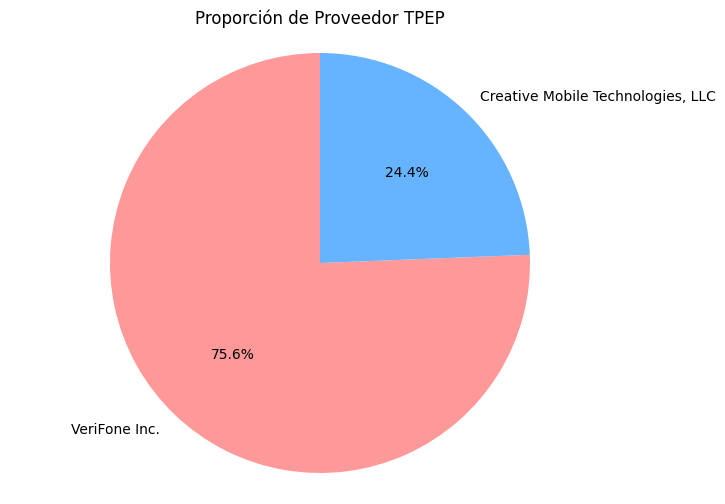

In [11]:
# Datos
vendor = {1:'Creative Mobile Technologies, LLC', 2:'VeriFone Inc.'}
vendor_counts = list(yellow_taxi['VendorID'].value_counts())
labels = ['VeriFone Inc.', 'Creative Mobile Technologies, LLC']
colors = ['#FF9999', '#66B3FF']

# Crear la gráfica circular
plt.figure(figsize=(8, 6))
plt.pie(vendor_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Proveedor TPEP')
plt.axis('equal')  # Aspecto igual para que sea un círculo

# Mostrar la gráfica
plt.show()


La tarifa identificada con el número `99`, que no figura en la documentación oficial, resalta por ser la **tercera más frecuente** en el uso durante los últimos tres meses. Es esencial prestar atención a esta tarifa debido a su inesperada alta incidencia.

In [12]:
yellow_taxi['RatecodeID']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
6198478    1.0
6198479    1.0
6198480    1.0
6198481    1.0
6198482    1.0
Name: RatecodeID, Length: 6018475, dtype: float64

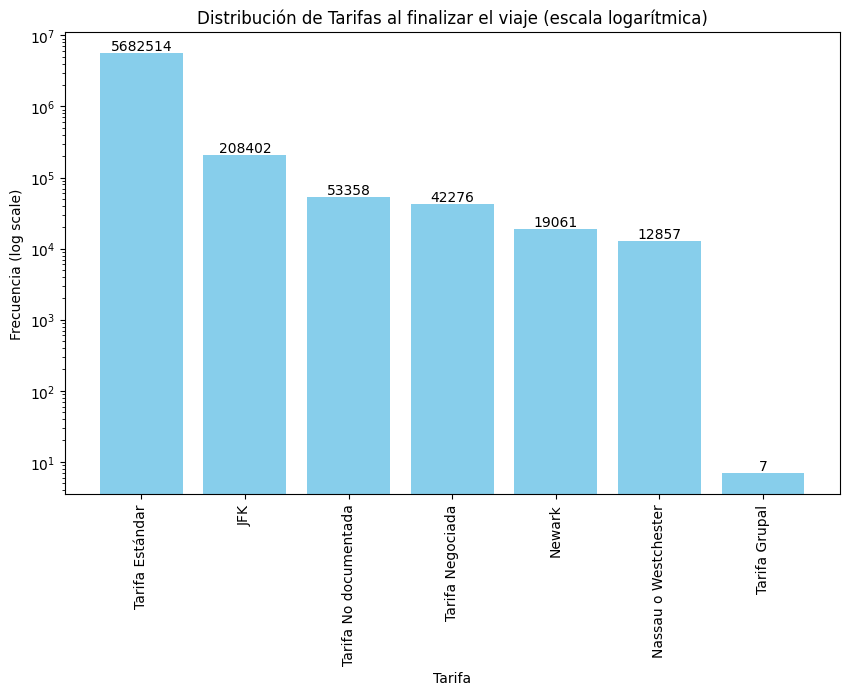

In [13]:
ratecode_counts = yellow_taxi['RatecodeID'].value_counts()
RCID = {1:'Tarifa Estándar',2:'JFK',3:'Newark',4:'Nassau o Westchester',5:'Tarifa Negociada',6:'Tarifa Grupal',99:'Tarifa No documentada'}
# Ahora, crearemos una lista de etiquetas basadas en el diccionario RCID para las barras del histograma.
labels = [RCID[id] if id in RCID else 'Other' for id in ratecode_counts.index]

# Crear el histograma con escala logarítmica en el eje y
plt.figure(figsize=(10, 6))
plt.bar(labels, ratecode_counts.values, color='skyblue')
plt.yscale('log')  # Escala logarítmica en el eje y

# Añadir título y etiquetas
plt.title('Distribución de Tarifas al finalizar el viaje (escala logarítmica)')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia (log scale)')
plt.xticks(rotation = 90)

# Mostrar las etiquetas en las barras
for i, value in enumerate(ratecode_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostrar el histograma
plt.show()


In [14]:
yellow_taxi[yellow_taxi['RatecodeID'] == 99].count()

VendorID                 53358
tpep_pickup_datetime     53358
tpep_dropoff_datetime    53358
passenger_count          53358
trip_distance            53358
RatecodeID               53358
store_and_fwd_flag       53358
PULocationID             53358
DOLocationID             53358
payment_type             53358
fare_amount              53358
extra                    53358
mta_tax                  53358
tip_amount               53358
tolls_amount             53358
improvement_surcharge    53358
total_amount             53358
congestion_surcharge     53358
Airport_fee              53358
dtype: int64

La información indica que la gran mayoría de los datos de los viajes en taxi se transmiten justo al finalizar el trayecto, lo cual sugiere que hay una capacidad para realizar un seguimiento en tiempo real. Sin embargo, un pequeño porcentaje, específicamente el **0.41%**, se guarda para enviar más tarde, lo que podría implicar ligeras demoras en la recepción de esos datos. Este patrón de envío de datos refuerza la viabilidad de implementar un sistema de monitoreo en tiempo real para la mayoría de los servicios de taxi.

In [15]:
porcentaje = list(yellow_taxi['store_and_fwd_flag'].value_counts())[1]/(list(yellow_taxi['store_and_fwd_flag'].value_counts())[0]+list(yellow_taxi['store_and_fwd_flag'].value_counts())[1])
print(f"La proporcion de registros almacenados y enviados posteriormente es del {round(porcentaje*100,2)}%")

La proporcion de registros almacenados y enviados posteriormente es del 0.41%


Es interesante observar que la mayoría de los viajes en taxi comienzan en **Manhattan**, **Queens** y **Brooklyn**, lo que no es sorprendente dado que son áreas muy transitadas en la ciudad de Nueva York. Sin embargo, también es relevante notar que existe un volumen significativo de viajes en los que **se desconoce el origen** del viaje. Esto podría deberse a diversas razones, como errores en la recopilación de datos o la falta de información precisa en algunos registros.

In [17]:
# Creando DF que relaciona Zona, Borough, Zona de Servicio y el número de servicios.
ZI = {'LocationID':list(yellow_taxi['PULocationID'].value_counts().index),
      'Número de servicios':list(yellow_taxi['PULocationID'].value_counts())}
ZonaInicio = pd.DataFrame(ZI)
# ZonaInicio.merge(zonas, by)
# zonas['LocationID']
ZonaInicio = pd.merge(ZonaInicio,zonas,on='LocationID', how='inner')

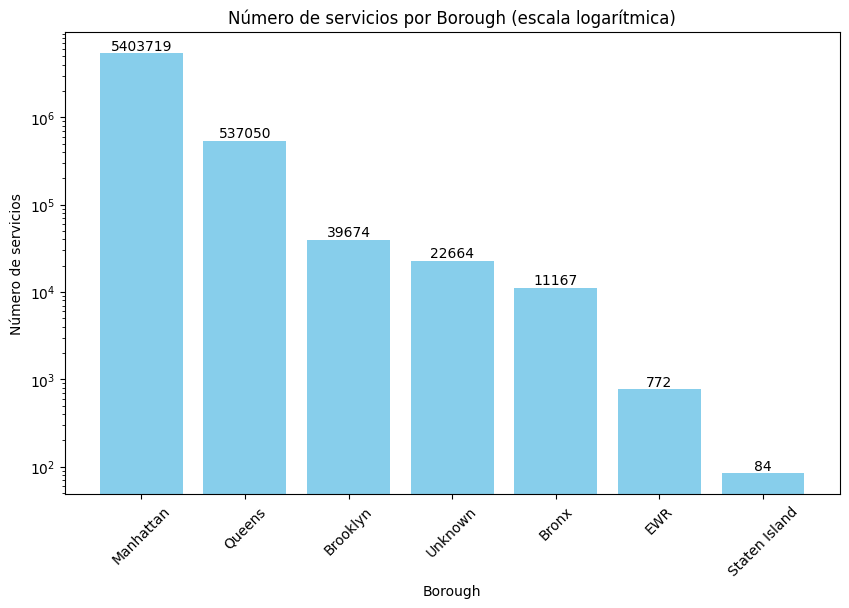

In [18]:
borough_services = ZonaInicio.groupby('Borough')['Número de servicios'].sum().reset_index()

# Ordenar los datos para una mejor visualización
borough_services_sorted = borough_services.sort_values('Número de servicios', ascending=False)

# Crear el histograma con escala logarítmica en el eje y
plt.figure(figsize=(10, 6))
plt.bar(borough_services_sorted['Borough'], borough_services_sorted['Número de servicios'], color='skyblue')
plt.yscale('log')  # Escala logarítmica en el eje y

# Mostrar las etiquetas en las barras
for i, value in enumerate(borough_services_sorted['Número de servicios'].values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Número de servicios por Borough (escala logarítmica)')
plt.xlabel('Borough')
plt.ylabel('Número de servicios')

# Girar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar el histograma
plt.show()


Es notable que los **Yellow Taxis** inician la mayoría de sus servicios en la **Yellow Zone**, con aproximadamente **5 millones de viajes**, lo que indica una alta concentración de actividad en esta área. Por otro lado, los viajes que comienzan en los **aeropuertos** representan alrededor de **470,000**, y en la **Boro Zone**, solo aproximadamente **220,000**. Esto muestra una distribución desigual de los servicios de taxi, con una clara preferencia por la Yellow Zone, probablemente debido a la alta demanda y la facilidad de acceso a pasajeros en esa área. La menor cantidad de servicios que se originan en los aeropuertos y en la Boro Zone podría reflejar una menor demanda y la presencia de otras opciones de transporte en esas zonas.

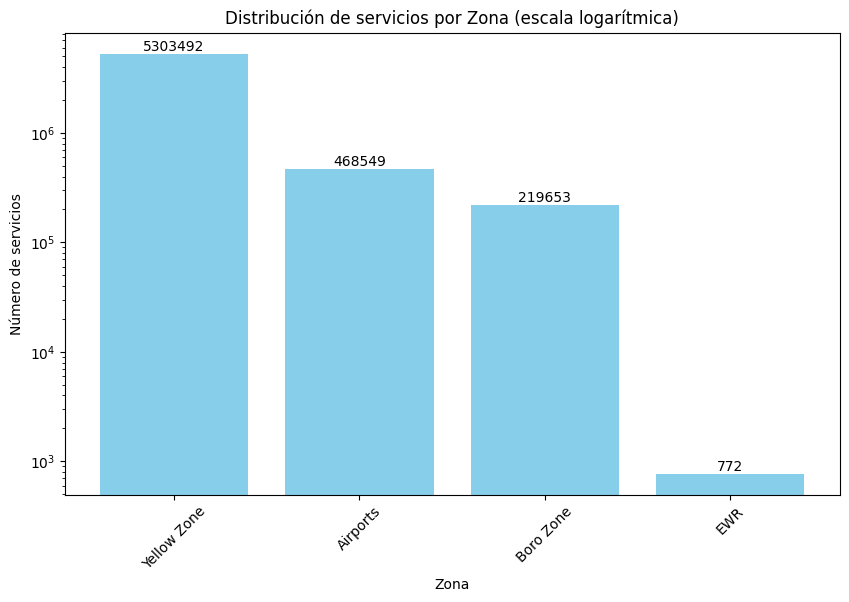

In [19]:
Zona_servicio = ZonaInicio.groupby('service_zone')['Número de servicios'].sum().reset_index()

# Ordenar los datos para una mejor visualización
Zona_servicio_sorted = Zona_servicio.sort_values('Número de servicios', ascending=False)

# Crear el histograma con escala logarítmica en el eje y
plt.figure(figsize=(10, 6))
plt.bar(Zona_servicio_sorted['service_zone'], Zona_servicio_sorted['Número de servicios'], color='skyblue')
plt.yscale('log')  # Escala logarítmica en el eje y

# Mostrar las etiquetas en las barras
for i, value in enumerate(Zona_servicio_sorted['Número de servicios'].values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Distribución de servicios por Zona (escala logarítmica)')
plt.xlabel('Zona')
plt.ylabel('Número de servicios')

# Girar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar el histograma
plt.show()


In [20]:
ZonaInicio[['Zone','Número de servicios']].dropna()

,Zone,Número de servicios
0,Upper East Side South,296462
1,Midtown Center,283673
2,JFK Airport,277643
3,Upper East Side North,270474
4,Midtown East,220232
...,...,...
256,Oakwood,1
257,Eltingville/Annadale/Prince's Bay,1
258,Charleston/Tottenville,1
259,Governor's Island/Ellis Island/Liberty Island,1


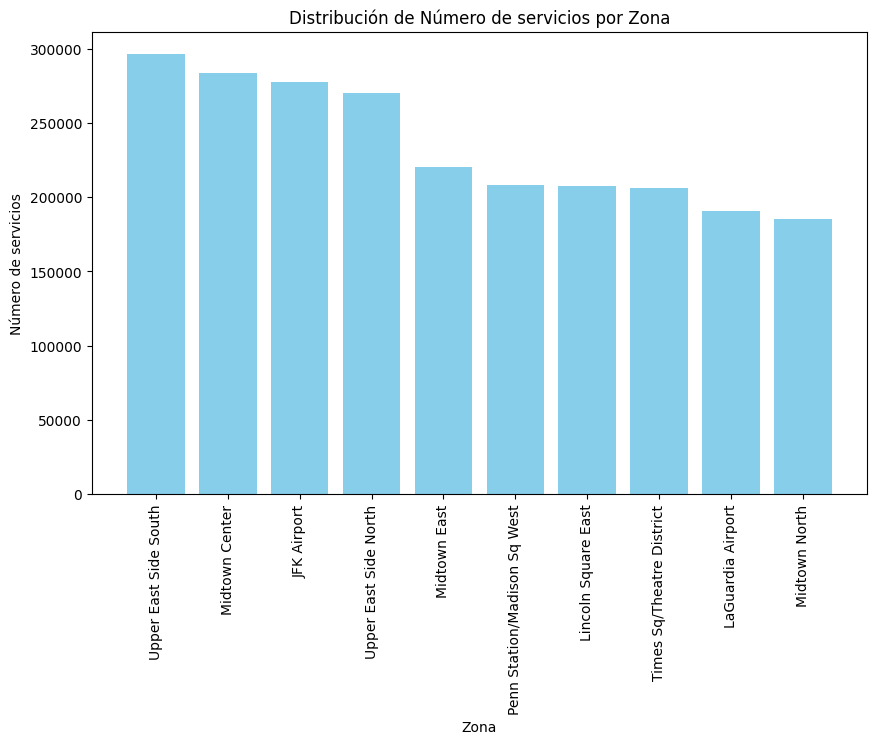

In [21]:
zona_sorted = ZonaInicio[['Zone', 'Número de servicios']].sort_values(by='Número de servicios', ascending=False).head(10)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(zona_sorted['Zone'].astype(str), zona_sorted['Número de servicios'], color='skyblue')  # Convertir a str

# Añadir título y etiquetas
plt.title('Distribución de Número de servicios por Zona')
plt.xlabel('Zona')
plt.ylabel('Número de servicios')

# Girar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)

# Mostrar el histograma
plt.show()


# Aun no termino, pero ya merito